In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [2]:
def null_piechart(column):
    plt.pie(data[column].notna().value_counts(),autopct='%0.2f',labels=['Not null','null'])
    plt.title(f'Null values dist for {column}')
    plt.show()
    

In [3]:
data=pd.read_csv('data/netflix.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Univariate analysis

## type

C:\Users\SONY\AppData\Local\Temp\ipykernel_12180\2278333917.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data['type'].value_counts(),palette='deep')


<Axes: xlabel='type', ylabel='count'>

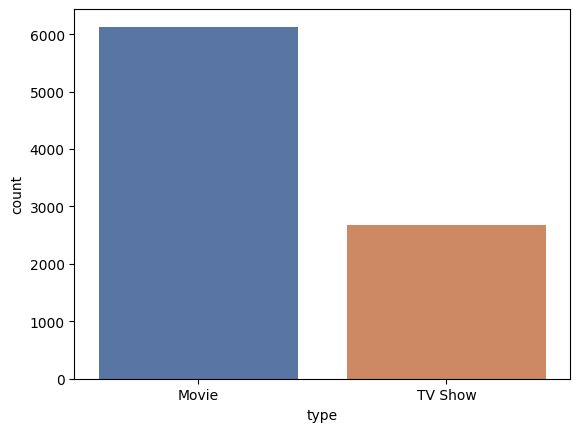

In [6]:
sns.barplot(data['type'].value_counts(),palette='deep')

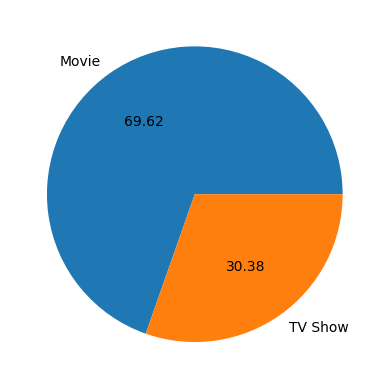

In [7]:
plt.pie(data['type'].value_counts(),autopct='%0.2f',labels=data['type'].value_counts().index)
plt.show()

## director        

In [8]:
data['director'].nunique()

4528

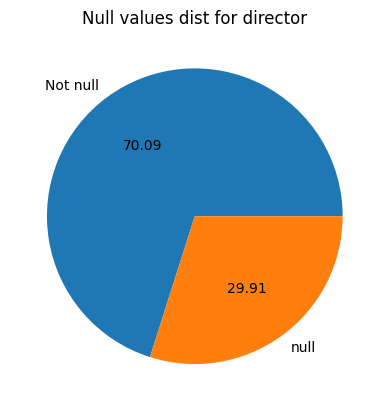

In [9]:
null_piechart('director')

## cast


In [10]:
data['cast'].nunique()

7692

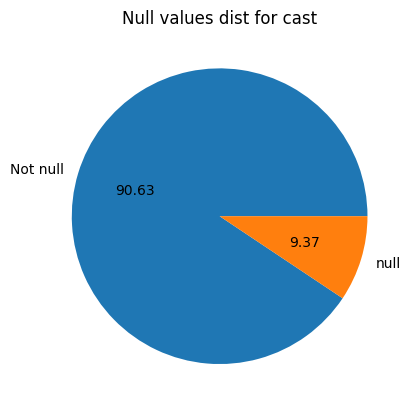

In [11]:
null_piechart('cast')

## country

In [12]:
country_count=data['country'].value_counts()
country_count

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

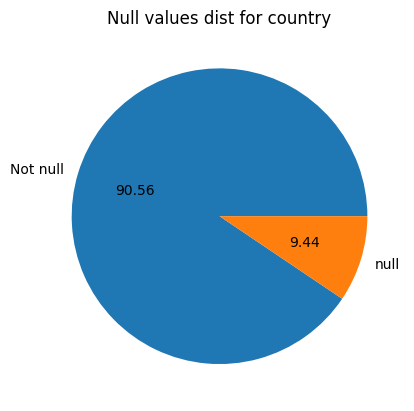

In [13]:
null_piechart('country')

## release year

<Axes: >

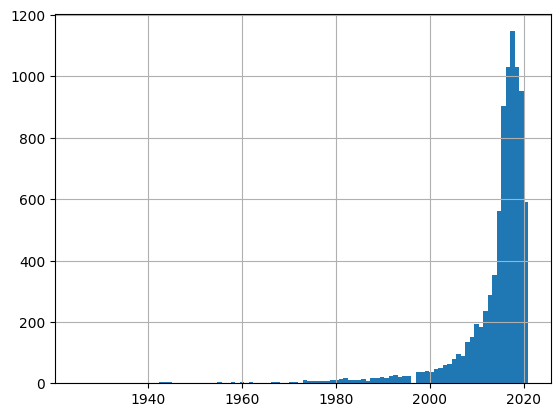

In [14]:
data['release_year'].hist(bins=100)

In [15]:
data['release_year'].describe()

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

## Rating

In [16]:
data['rating'].nunique()

17

<Axes: xlabel='rating', ylabel='count'>

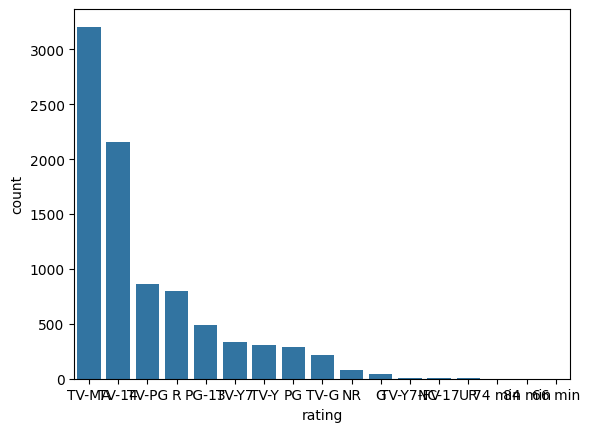

In [17]:
sns.barplot(data['rating'].value_counts())

In [18]:
data.isna().sum()[data.isna().sum()>0]

director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64

In [19]:
data['director'].mode()

0    Rajiv Chilaka
Name: director, dtype: object

In [20]:
data['rating'].fillna(data['rating'].mode())

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

In [21]:
data['rating'].fillna(data['rating'].mode()).isna().sum()

4

In [22]:
data['rating'].mode()[0]

'TV-MA'

In [23]:
data['rating'].fillna(data['rating'].mode()[0]).isna().sum()

0

# bronze data

In [24]:
bronze=pd.read_csv('data/bronze.csv')
bronze.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [25]:
df=pd.read_csv('data/netflix.csv')
df[df['title']=='Eyes of a Thief']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
365,s366,Movie,Eyes of a Thief,Najwa Najjar,"Khaled Abol El Naga, Souad Massi, Suhail Hadda...",", France, Algeria","July 30, 2021",2014,TV-14,103 min,"Dramas, Independent Movies, International Movies","After a decade in prison, a Palestinian man wi..."


In [60]:
silver=pd.read_csv('data/silver.csv')


In [42]:
country_df.shape

(10850, 2)

In [61]:
silver.head()


,type,title,date_added,release_year,rating,duration,listed_in,description,director,cast,country,year,month,day_of_week
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson,Unknown,United States,2021,9,5
1,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Unknown,Ama Qamata,South Africa,2021,9,4
2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Unknown,Khosi Ngema,South Africa,2021,9,4
3,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Unknown,Gail Mabalane,South Africa,2021,9,4
4,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Unknown,Thabang Molaba,South Africa,2021,9,4


In [76]:
silver[['duration','type']].apply(lambda x: x['duration'].split(' ')[0] if x['type']=='Movie' else 'NA',axis=1)

0         90
1         NA
2         NA
3         NA
4         NA
        ... 
89365    111
89366    111
89367    111
89368    111
89369    111
Length: 89370, dtype: object

In [86]:
gold=pd.read_csv('data/gold.csv')
gold.head()

,type,title,date_added,release_year,rating,description,director,cast,country,listed_in,year_added,month_added,day_of_week,Movie_duration,Seasons
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",Kirsten Johnson,Unknown,United States,Documentaries,2021,9,Saturday,90,Not applicable
1,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Unknown,Ama Qamata,South Africa,International TV Shows,2021,9,Friday,Not applicable,2
2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Unknown,Ama Qamata,South Africa,TV Dramas,2021,9,Friday,Not applicable,2
3,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Unknown,Ama Qamata,South Africa,TV Mysteries,2021,9,Friday,Not applicable,2
4,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Unknown,Khosi Ngema,South Africa,International TV Shows,2021,9,Friday,Not applicable,2


In [87]:
gold.isna().sum()

type              0
title             0
date_added        0
release_year      0
rating            0
description       0
director          0
cast              0
country           0
listed_in         0
year_added        0
month_added       0
day_of_week       0
Movie_duration    0
Seasons           0
dtype: int64